In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
import seaborn as sns
%matplotlib inline

In [19]:
file=r'https://raw.githubusercontent.com/jigar-pandit/ml1/master/winequality-white.csv'
data = pd.read_csv(file, sep=';')
df = pd.DataFrame(data)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [21]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

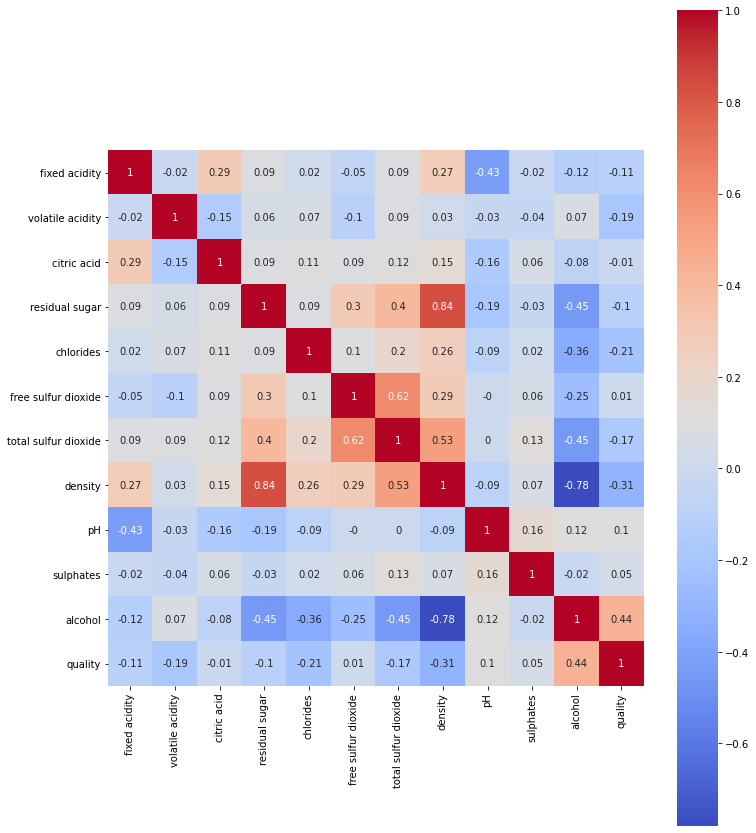

In [22]:
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(12,15))
sns.heatmap(data=correlation_matrix, annot=True ,square=True, cmap= 'coolwarm')

In [23]:
x = df.drop(['quality'],axis=1)
y = df['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1,stratify = y)

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print("Training Accuracy : " + str(model.score(x_train,y_train)))
print("Testing Accuracy : " + str(model.score(x_test,y_test)))

Training Accuracy : 0.45828471411901983
Testing Accuracy : 0.4598639455782313


In [26]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
print(IQR)
df_out = df[~((df<(q1 - 2.0 *IQR))| (df>(q3 + 2.0 *IQR))).any(axis=1)]
df_out.shape

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


(4364, 12)

In [27]:
x= df_out.drop('quality', axis =1)
y= df_out['quality']
df_bins=df.copy();
print(df_bins['quality'].unique())
df_bins['quality'] = df_bins['quality'].replace([3,4,5],0)
df_bins['quality'] = df_bins['quality'].replace([6,7,8,9],1)
print(df_bins['quality'].unique())

[6 5 7 8 4 3 9]
[1 0]


In [29]:
x= df_bins.drop('quality', axis =1)
y= df_bins['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=1,stratify = y)
model = LogisticRegression(C=100)
model.fit(x_train,y_train)
print("Training Accuracy : " + str(model.score(x_train,y_train)))
print("Testing Accuracy : " + str(model.score(x_test,y_test)))

Training Accuracy : 0.7462564661040022
Testing Accuracy : 0.756734693877551


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
